Automatic (derivatives ) for the people and a song of ice and fire

Deadline:07_09_25

group number 12: 

 Amund Romseland Brevik
 
 Baraa Nidal Ghannoum

 Magnus Helvik Forsdahl 

 








Abstract: 

what is the project about? 

what are the main problems investigated?

what are the key numerical methods explored? 

whaat are the main finding  or results, especially quantitavtive statements? 




Introduction: 

what is the overall context of this project?




exercise 1: 


1.1

In [9]:
import sys
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

max=1.7976931348623157e+308 -
This is the largest floating point number that python can represent. Any attempt to go higher will result in inf.
A double uses 1 bit for sign, 11 bits for exponent, 52 bits for fraction (mantissa).

min=2.2250738585072014e-308 - This is the smallest positive normalized floating-point number. The minimum exponent for normalized numbers is −1022. 1.0 × 2^-1022 ≈ 2.2250738585072014 × 10^-308

epsilon = 2.220446049250313e-16 - The difference between 1.0 and the next representable floating-point value. Double precision has 53 bits of precision. So the spacing between floating-point numbers around 1.0 is 2^-52. So if you add anything smaller than epsilon to 1.0, rounding will round it equal to 1.0

1.2

In [10]:
x = 0.1 + 0.2
print(x)
x = 0.125 + 0.25
print(x)

0.30000000000000004
0.375


0.1 + 0.3 != 0.3 because decimal 0.1 and 0.2 cannot be represented exactly in binary. Both 0.1 and 0.2 are infinite repeating fractions. IEEE 754 double precision stores only 53 bits of precision, so the binary fraction is rounded. Therefore when you add two approximations, the result will also be an approximation.

0.125 + 0.25 = 0.375 does not have a precision error because all the numbers can be represented in binary.

1.3

You should not use the "==" operator to test whether two floating-point numbers are equal because floats are often approximations as shown previously. So unless you know that the numbers are exactly representable you should not use the "==" operator. The code under shows one way of doing a floating-point number comparison with the math module.

In [1]:
import math 

print(math.isclose(0.1 + 0.2, 0.3))

True


exercise 2: 

Utfordringer: (til senere)
1) laste ned numpy løsning: "pip install numpy"

1. Create a native Python list of the same size as x and holding the same
 values, i.e. define x as a list x=[0,1,2,3,4,5,6,7,8,9]. Apply the same
 two function calls to this list, i.e. np.exp(x) and np.exp(-x). Explain
 what happens.


In [ ]:
import numpy as np
def exponent_function(List):
    """
    Function that takes in a list and uses the funtions np.exp(x) and np.exp(-x), then prints the result

    Args:
        List (list of int/float): A list of numbers.
    """
    print(np.exp(List))
    print(np.exp(-List))
    return

x = [0,1,2,3,4,5,6,7,8,9]
x = np.array(x) #Unsure if you want us to do this, if not an error will be raised
exponent_function(x)

[1.00000000e+00 2.71828183e+00 7.38905610e+00 2.00855369e+01
 5.45981500e+01 1.48413159e+02 4.03428793e+02 1.09663316e+03
 2.98095799e+03 8.10308393e+03]
[1.00000000e+00 3.67879441e-01 1.35335283e-01 4.97870684e-02
 1.83156389e-02 6.73794700e-03 2.47875218e-03 9.11881966e-04
 3.35462628e-04 1.23409804e-04]


Explanation:
In the first list np.exp(x) we can see how the numbers increase exponentially for each element in the list as it goes on. Example: first number of list is 0, here euler gets the number 0 as an exponent(e^0). The next element is 1, so here it will be (e^1) and we see how the output is 2.718, which is Euler.

When doing np.exp(-x), it then does the same thing (goes trough the whole list etc) but instead it's exponent is negative (e^-x). Here we can see that the output list the numbers get's exponentially smaller. Where the first number is 1 becouse (e^0=1), and the next number is 3.67*10^(-1)= 0.36. 

2. How would you generally evaluate a function on all elements of a native
 Python list? (as opposed to a NumPy array)

 Generally i would use an for-loop to go through each element of the list, Like this:

In [ ]:
import math
def native_exp_forloop(List):
    """
    Takes a list of numbers and returns a new list where each element
    is e raised to the power of the corresponding element in the input list.
    
    Args:
        List (list of int/float): A list of numbers.
    
    Returns:
        list of float: A list containing e^x for each x in the input list.
    """
    result_exp = []
    for x in List:
        result_exp.append(math.exp(x))
    return result_exp

print(native_exp_forloop([0,1,2,3,4,5,6,7,8,9]))

[1.0, 2.718281828459045, 7.38905609893065, 20.085536923187668, 54.598150033144236, 148.4131591025766, 403.4287934927351, 1096.6331584284585, 2980.9579870417283, 8103.083927575384]


Exercise 3:  Finite differences (FD) with functions: 

part1: Visualizing the function 





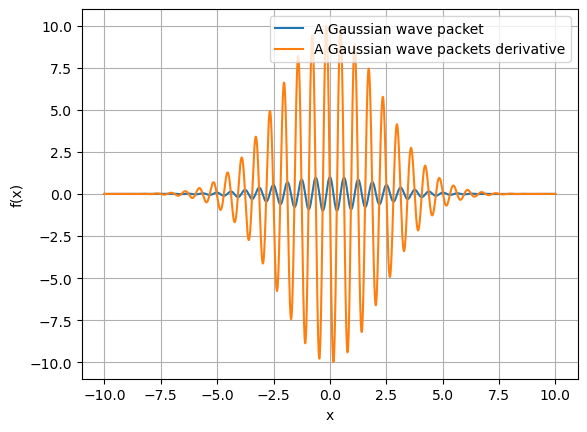

In [3]:
import numpy as np
import matplotlib.pyplot as plt
#define the function
def f(x, a=0.1, b=10): 
    return np.cos(b*x)*np.exp(-a*x**2)
#define the derivative of the function
def df(x, a=0.1, b=10): 
    #return -b*np.sin(b*x)*np.exp(-a*x**2) - 2*a*x*np.cos(b*x)*np.exp(-a*x**2)
    term1=-b*np.sin(b*x)*np.exp(-a*x**2)
    term2=-2*a*x*np.cos(b*x)*np.exp(-a*x**2)
    return term1 + term2
#####other soulution is using this : 
#def plot_function(fun, x_min, x_max,a=0.1, b=10,  num_points=1000):
#    x = np.linspace(x_min, x_max, num_points)
#    y = fun(x, a, b)
#    plt.figure(figize=(10,6))
#plt.plot(x,y,label=f'f(x), a={a}, b={b}')
#plt.title('Plot of the function')
#plt.xlabel('x')
#plt.ylabel('f(x)')
#plt.grid()
#plt.legend()
#plt.show()

#plot the function and its derivative
x = np.linspace(-10,10, 1000000)  
plt.plot(x,f(x), label="A Gaussian wave packet")      
plt.plot(x, df(x), label="A Gaussian wave packets derivative")   
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show()  

part 2: The analytical derivative 


In [ ]:
#the df function is defined above
#test the analytical derivative at a specific point(can be any point just change the values of them..)
x_test=1
a_value=0.1
b_value=10
df_analytical=df(x_test, a=a_value, b=b_value)
print(f"The analytical derivative at x={x_test} is {df_analytical} ")

The analytical derivative at x=1 is 5.074351236525322 


part3: forword difference method


In [ ]:
def forward_difference(f, x, h, *args ):
    return (f(x + h, *args) - f(x, *args)) / h    

#using args to pass additional parameters a and b to the function f
x_point=1.0
h_step=1e-2  #step size

forward_diff=forward_difference(f, x_point, h_step, a_value, b_value)
print(f"The forward difference approximation at x={x_point} with h={h_step} is {forward_diff} ")
#check that the forward difference is close to the analytical derivative
#renaming the variable for clarity
analytical_results=df_analytical
print(f"analytical solution for f'(x) at x={x_point} is {analytical_results:.6f}")
print(f"Absolut difference between analytical and forward difference: {abs(forward_diff - analytical_results):.6f}")
if abs(forward_diff - analytical_results) < 1e-3: 
    #used 1e-3 insted of 1e-2 to make sure the result is more accurate
    print("The forward difference approximation is close to the analytical derivative.")
else:
    print("The forward difference approximation is NOT close to the analytical derivative.")    
    




The forward difference approximation at x=1.0 with h=0.01 is 5.435423085794688 
analytical solution for f'(x) at x=1.0 is 5.074351
Absolut difference between analytical and forward difference: 0.361072
The forward difference approximation is NOT close to the analytical derivative.


exercise 4:

4.1

In [4]:
class duple:
    """
    Class for automatic differentiation
    top: function value
    bottom: derivative of function
    """
    def __init__(self,top, bottom=0):
        self.top = top
        self.bottom = bottom
    
    def __add__(self, d): # u+v, u’+v’
        return duple(self.top + d.top, self.bottom + d.bottom ) 
    # 4.3 Part 1
    def __repr__(self):
        return "["+str(self.top)+","+str(self.bottom)+"]"
    def __str__(self):
        return "["+str(self.top)+","+str(self.bottom)+"]"
    # 4.3 Part 2
    def __pos__(self):
        return duple(+self.top, +self.bottom)
    def __neg__(self):
        return duple(-self.top, -self.bottom)
    def __sub__(self, d):
        return duple(self.top - d.top, self.bottom - d.bottom)
    # 4.4 Part 3
    def __mul__(self, d):
        return duple(
            self.top * d.top,
            self.bottom * d.top + self.top * d.bottom
        )
    def __truediv__(self, d):
        return duple(
            self.top / d.top,
            (self.bottom * d.top - self.top * d.bottom) / (d.top ** 2)
        )

4.2 Part 1

In [ ]:
x = duple(3, 1)
print(x.top, x.bottom) # 3 1
y = duple(3)
print(y.top, y.bottom) # 3 0 since y.bottom was not set and self.bottom = 0 by default.

3 1
3 0


 Part 2

In [6]:
class point:
    """
    Class for points
    """
    def __init__(self, x=0, y=0, z=0):
        self.x = x
        self.y = y
        self.z = z

t = point(1, 2, 3)
print(t.x, t.y, t.z)

1 2 3


In [18]:
x=duple(1,2)
y=duple(3,4)
z=x+y
print(z.top, z.bottom)

4 6


4.3 Part 1

In [47]:
x=duple(1,2)
y=duple(3,4)
x+y # It prints out [4,6] by itself. Would be the same as print(x+y)

[4,6]

Part 2

In [50]:
print(-x)
print(x-y)

[-1,-2]
[-2,-2]


Part 3

In [ ]:
#Test of Code from pdf
x=1.2 # just for making it easy to use other values
One=duple(1.,0.) # derivative of a constant is zero
X=duple(x,1) # derivative of x with respect to x is 1
print("auto diff=",X*X*X)
print("analytical=",x*x*x, 3*x*x)
print("auto diff=", One/(One+X))
print("analytical=", 1/(1+x),-1/(1+x)**2)
Exp=duple(np.exp(x),np.exp(x)) # derivative of exp(x) is exp(x)
Sin=duple(np.sin(x),np.cos(x)) # derivative of sin(x) is cos(x)
print("auto diff=", Exp*Sin)
print("analytical=", np.exp(x)*np.sin(x), np.exp(x)*np.sin(x)+np.exp(x)*np.cos(x))

auto diff= [1.728,4.32]
analytical= 1.728 4.319999999999999
auto diff= [0.45454545454545453,-0.20661157024793386]
analytical= 0.45454545454545453 -0.20661157024793386
auto diff= [3.0944787419716917,4.297548854694511]
analytical= 3.0944787419716917 4.297548854694511


Part 4

In [10]:
class dfunction:
    def __init__(self, f, df):
        self.f = f
        self.df = df
    def __call__(self,d: duple): # kernel rule sending in and returning duple
        return duple(
            self.f(d.top), 
            self.df(d.top) * d.bottom
        ) #fill inn kernel rule here!


In [ ]:
#Test of code from pdf
def f(x):
    return np.log(x)
def df(x):
    return 1/x
x=3.1
One=duple(1.,0.) # derivative of a constant is zero
X=duple(x,1) # derivative of x with respect to x is 1
Log=dfunction(f,df) #note no arguments to f - we are passing the function
Exp=dfunction(np.exp,np.exp) # same here
print("auto diff ", Log(One+Exp(X)))
print("analytical ", np.log(1+np.exp(x)),np.exp(x)/(1+np.exp(x)))


auto diff  [3.144063967938574,0.9568927450589139]
analytical  3.144063967938574 0.9568927450589139


Part 5

In [28]:
x = 1.0
a = 0.1
b = 10.0

Cos = dfunction(np.cos, lambda x: -np.sin(x)) #Creates dfunction for cosinus and a lambda function for the derivative of cosinus to pass on the x
Exp = dfunction(np.exp, np.exp) #Same as previous exponent dfunction.

X = duple(x, 1)     # Variable x with derivative
A = duple(a, 0)     # Constant a with derivative
B = duple(b, 0)     # Constant b with derivative

wave = Cos(B*X) * Exp(-A*X*X)

wave_analytical_f = np.cos(b*x) * np.exp(-a*x**2)
wave_analytical_df = -b*np.sin(b*x)*np.exp(-a*x**2) + np.cos(b*x)*(-2*a*x)*np.exp(-a*x**2)
#Test
print("auto diff ", wave)
print("analytical ", wave_analytical_f,  wave_analytical_df)
print("absolute error ", abs(wave_analytical_df - wave.bottom))

auto diff  [-0.7592233159170217,5.074351236525322]
analytical  -0.7592233159170217 5.074351236525322
absolute error  0.0


Part 6

Automatic differentiation (AD) is used because functions are often too complicated to differentiate by hand and would require too much time. Some examples of the use in specific fields are:

-Simulations/modeling. AD can be used to solve differential equations. It is also used for sensitivity analysis and parameter estimation in models but I do not have any experience with that.

-Optimization problems. Often used in engineering, finance and physics problems where gradient based optimization is required.

-Machine Learning. It is also used in machine learning which is very relevant today.

Strengths:

-AD does not suffer from truncation errors. No approximation

- More efficient than Numerical Differentiation(ND)

- Works for complex functions composed of many operations which would be difficult to solve using ND

Weaknesses: 

- You need an initial setup/Implementation complexity. In our case we needed a special data structure like "duple".

- Might be quicker to use ND for simple cases to avoid the set up.

- Large models using AD can use a lot of memory because previous results are stored for backpropagation. Chain rule is a good example of this.

exercise 5: 

self reflections: 

References: 